In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# EDA and Preprocessing

In [78]:
data=pd.read_csv("E:\GPL\project 2\data.csv")
data.head()
print(data.shape)

(209499, 43)


Shape of your Data Set loaded: (209499, 43)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    42 Predictors classified...
        7 variable(s) removed since they were ID or low-information variables
Since Number of Rows in data 209499 exceeds maximum, randomly sampling 209499 rows for EDA...

################ Binary_Classification problem #####################
There are 3579 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,0,0.000000,90.000000,No issue
gender,object,0.000000,0,,,No issue
education,object,0.000000,0,,,"4 rare categories: [' 1st 2nd 3rd or 4th grade', ' Prof school degree (MD DDS DVM LLB JD)', ' Doctorate degree(PhD EdD)', ' Less than 1st grade']. Group them into a single category or drop the categories."
class,object,49.381313,0,,,"101686 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2 rare categories: [' Never worked', ' Without pay']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
marital_status,object,0.000000,0,,,"2 rare categories: [' Married-spouse absent', ' Married-A F spouse present']. Group them into a single category or drop the categories."
race,object,0.000000,0,,,No issue
is_hispanic,object,0.000000,0,,,"4 rare categories: [' Cuban', ' NA', ' Chicano', ' Do not know']. Group them into a single category or drop the categories."
employment_commitment,object,0.000000,0,,,"3 rare categories: [' PT for econ reasons usually PT', ' Unemployed part- time', ' PT for econ reasons usually FT']. Group them into a single category or drop the categories."
employment_stat,int64,0.000000,0,0.000000,2.000000,Column has 19941 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
wage_per_hour,int64,0.000000,0,0.000000,9999.000000,Column has 11854 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.


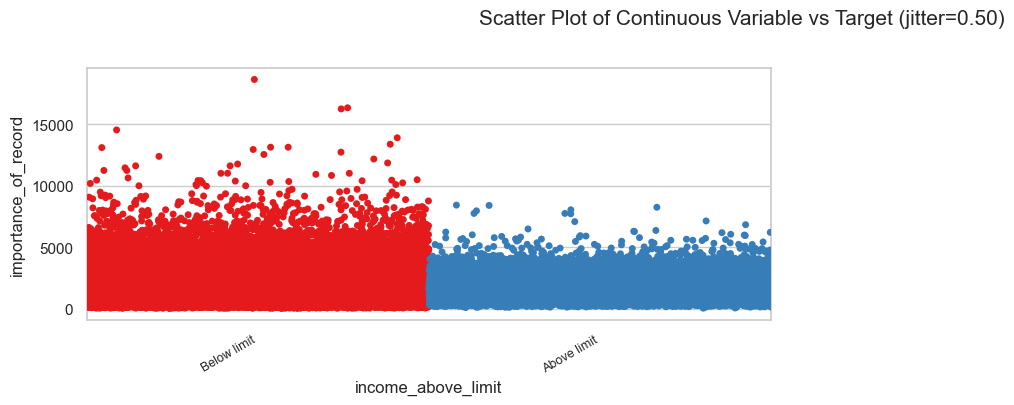

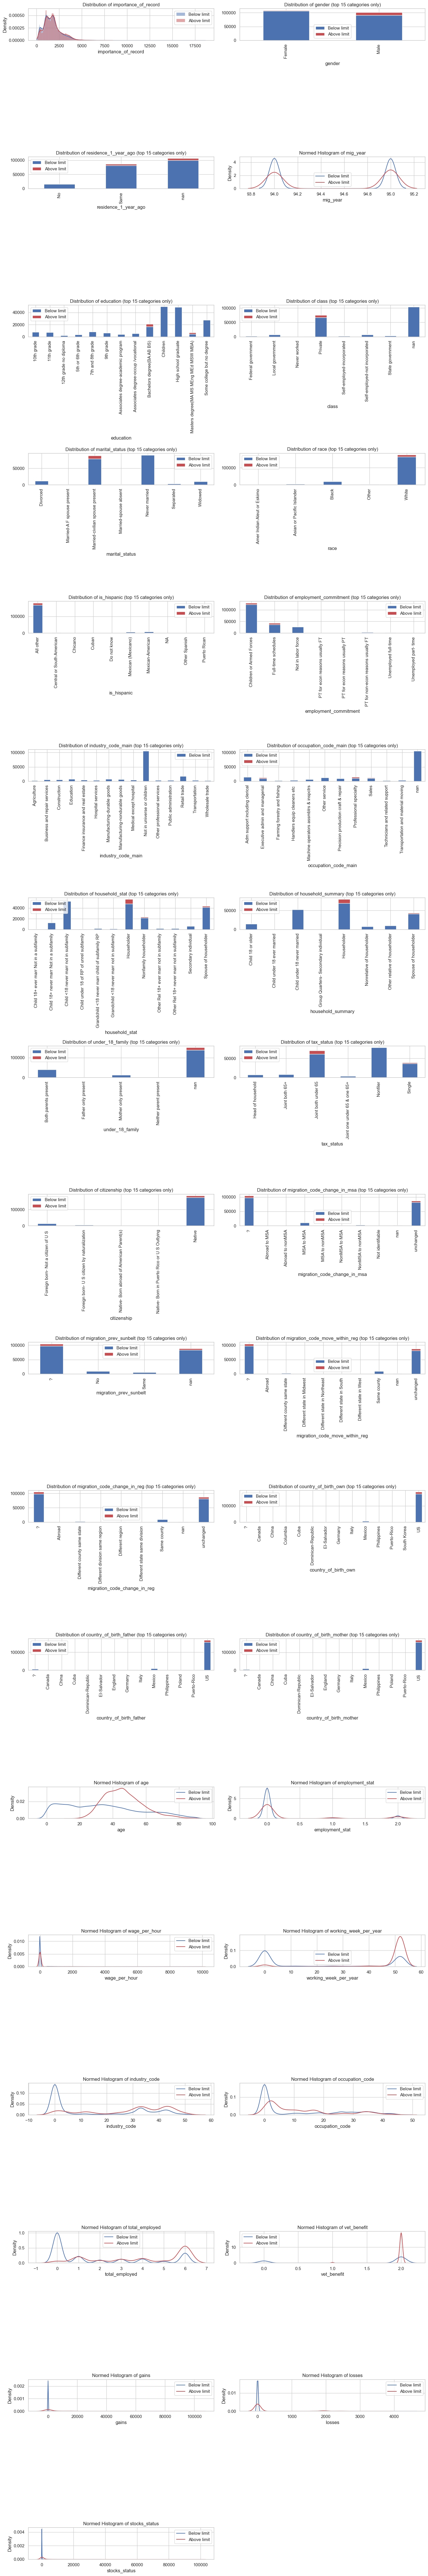

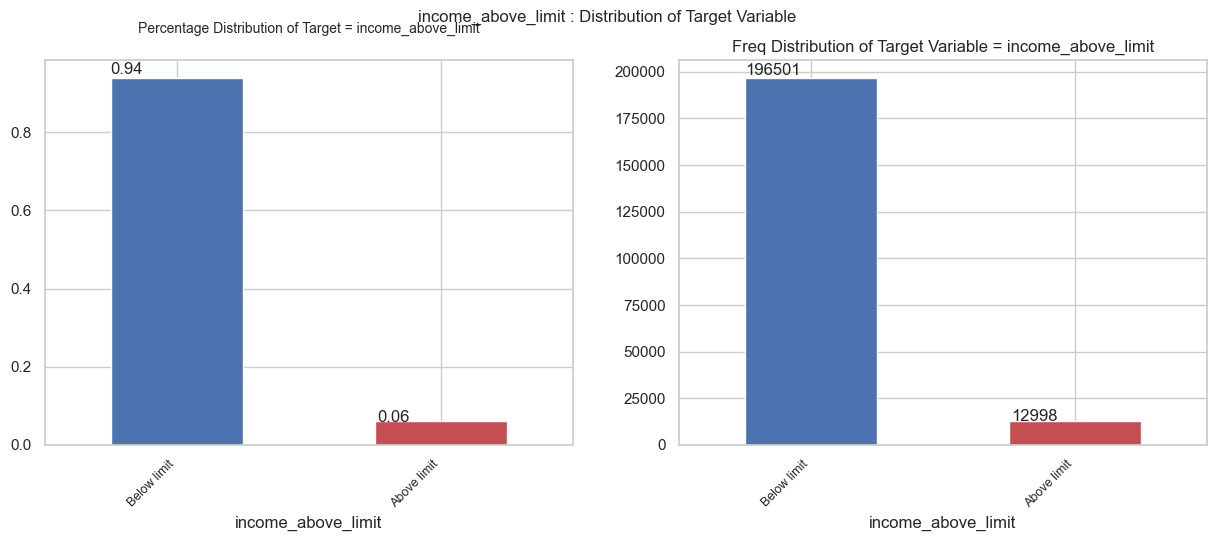

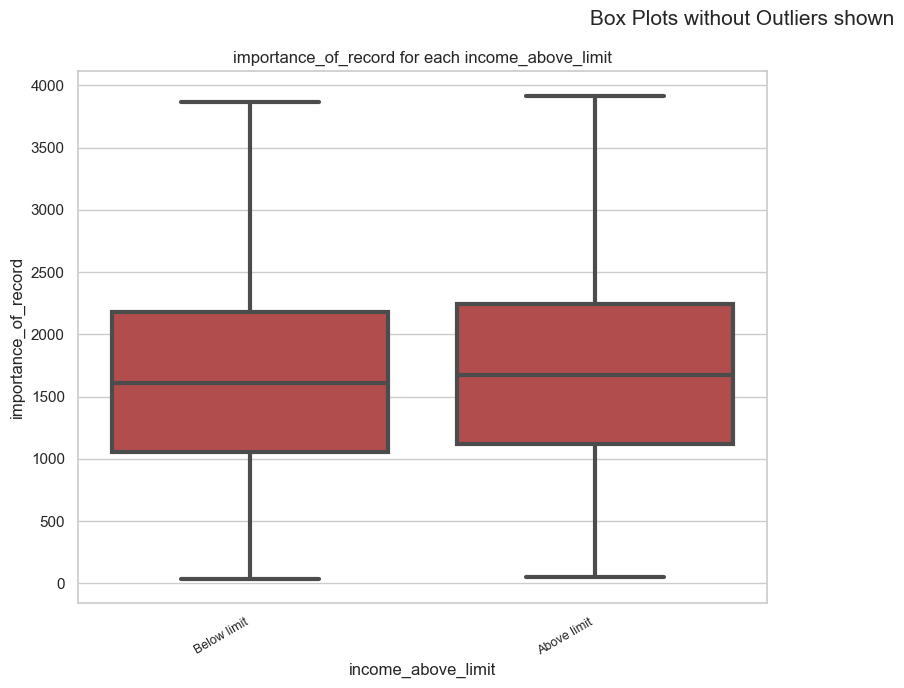

Could not draw some Heat Maps


<Figure size 2000x2000 with 0 Axes>

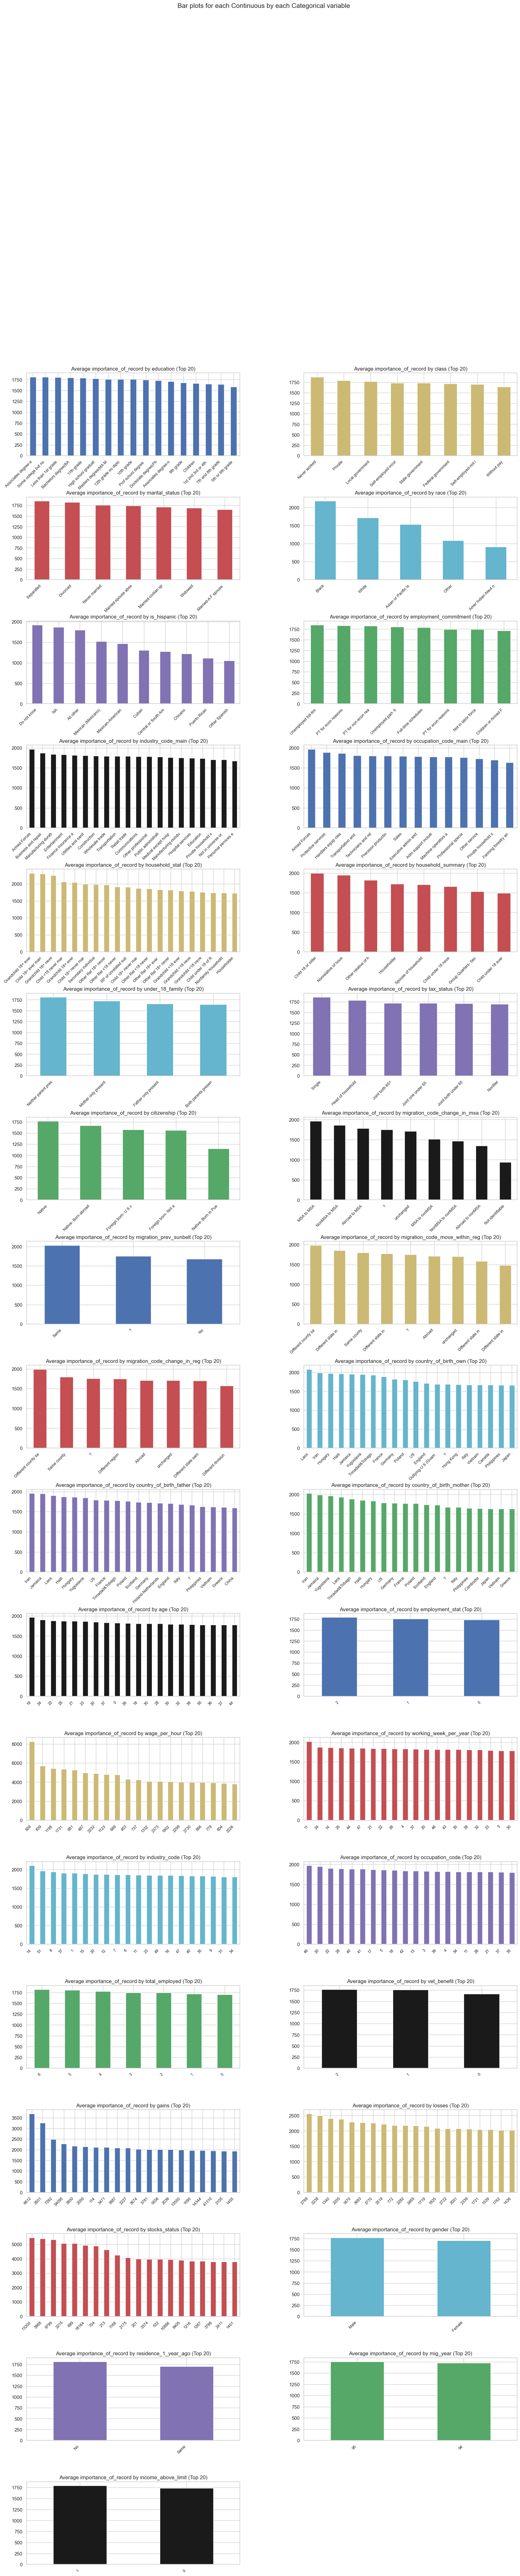

All Plots done
Time to run AutoViz = 80 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,importance_of_record,income_above_limit
19579,21,Female,Some college but no degree,Private,Married-A F spouse present,White,Mexican-American,Children or Armed Forces,0,0,0,40,Entertainment,19,Sales,0,Spouse of householder,Spouse of householder,NaN,2,Joint both under 65,0,0,0,Native,94,US,Mexico,Mexico,MSA to MSA,Same,Same county,Same county,No,1039.51,0
106657,43,Female,10th grade,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,2,659,52,41,Hospital services,30,Other service,3,Spouse of householder,Spouse of householder,NaN,2,Joint both under 65,0,0,0,Native,94,US,US,US,NonMSA to nonMSA,No,Same county,Same county,No,1931.55,0
71489,27,Male,Some college but no degree,Private,Never married,White,All other,Children or Armed Forces,0,0,52,45,Other professional services,5,Professional specialty,5,Nonfamily householder,Householder,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,2012.42,0
121930,36,Male,High school graduate,Federal government,Never married,White,All other,Full-time schedules,0,0,52,24,Manufacturing-nondurable goods,25,Adm support including clerical,6,Secondary individual,Nonrelative of householder,NaN,2,Single,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,606.71,0
157122,36,Female,10th grade,Private,Divorced,Black,All other,Children or Armed Forces,2,0,26,6,Manufacturing-durable goods,37,Machine operators assmblrs & inspctrs,3,Householder,Householder,NaN,2,Head of household,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,2941.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,52,Female,Some college but no degree,Private,Never married,White,All other,Full-time schedules,0,0,52,40,Entertainment,2,Executive admin and managerial,6,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,2,Single,0,0,0,Native,95,US,US,Italy,?,?,?,?,NaN,1868.61,0
117952,59,Female,10th grade,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,42,Medical except hospital,29,Other service,2,Spouse of householder,Spouse of householder,NaN,2,Joint both under 65,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,640.68,0
173685,46,Male,Bachelors degree(BA AB BS),Self-employed-incorporated,Never married,White,All other,Full-time schedules,0,0,52,2,Agriculture,43,Farming forestry and fishing,1,Nonfamily householder,Householder,NaN,2,Single,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,3089.62,0
43567,41,Female,High school graduate,Self-employed-not incorporated,Married-civilian spouse present,White,Mexican-American,PT for non-econ reasons usually FT,0,0,50,33,Retail trade,12,Professional specialty,1,Spouse of householder,Spouse of householder,NaN,2,Joint both under 65,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,1816.39,0


In [9]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
AV.AutoViz('E:\GPL\project 2\data.csv', sep=',', depVar='income_above_limit', dfte=data, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=209499,max_cols_analyzed=43)

In [4]:
# from sklearn import datasets, decomposition 
# iris = datasets.load_iris() 
# X = iris.data 
# y = iris.target 
# pca = decomposition.PCA(n_components=2) 
# X = pca.fit_transform(X) 
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y) 

In [79]:
data.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [6]:
data.nunique()

ID                                209499
age                                   91
gender                                 2
education                             17
class                                  8
education_institute                    2
marital_status                         7
race                                   5
is_hispanic                           10
employment_commitment                  8
unemployment_reason                    5
employment_stat                        3
wage_per_hour                       1232
is_labor_union                         2
working_week_per_year                 53
industry_code                         52
industry_code_main                    24
occupation_code                       47
occupation_code_main                  14
total_employed                         7
household_stat                        38
household_summary                      8
under_18_family                        4
veterans_admin_questionnaire           2
vet_benefit     

# univariate analysis

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

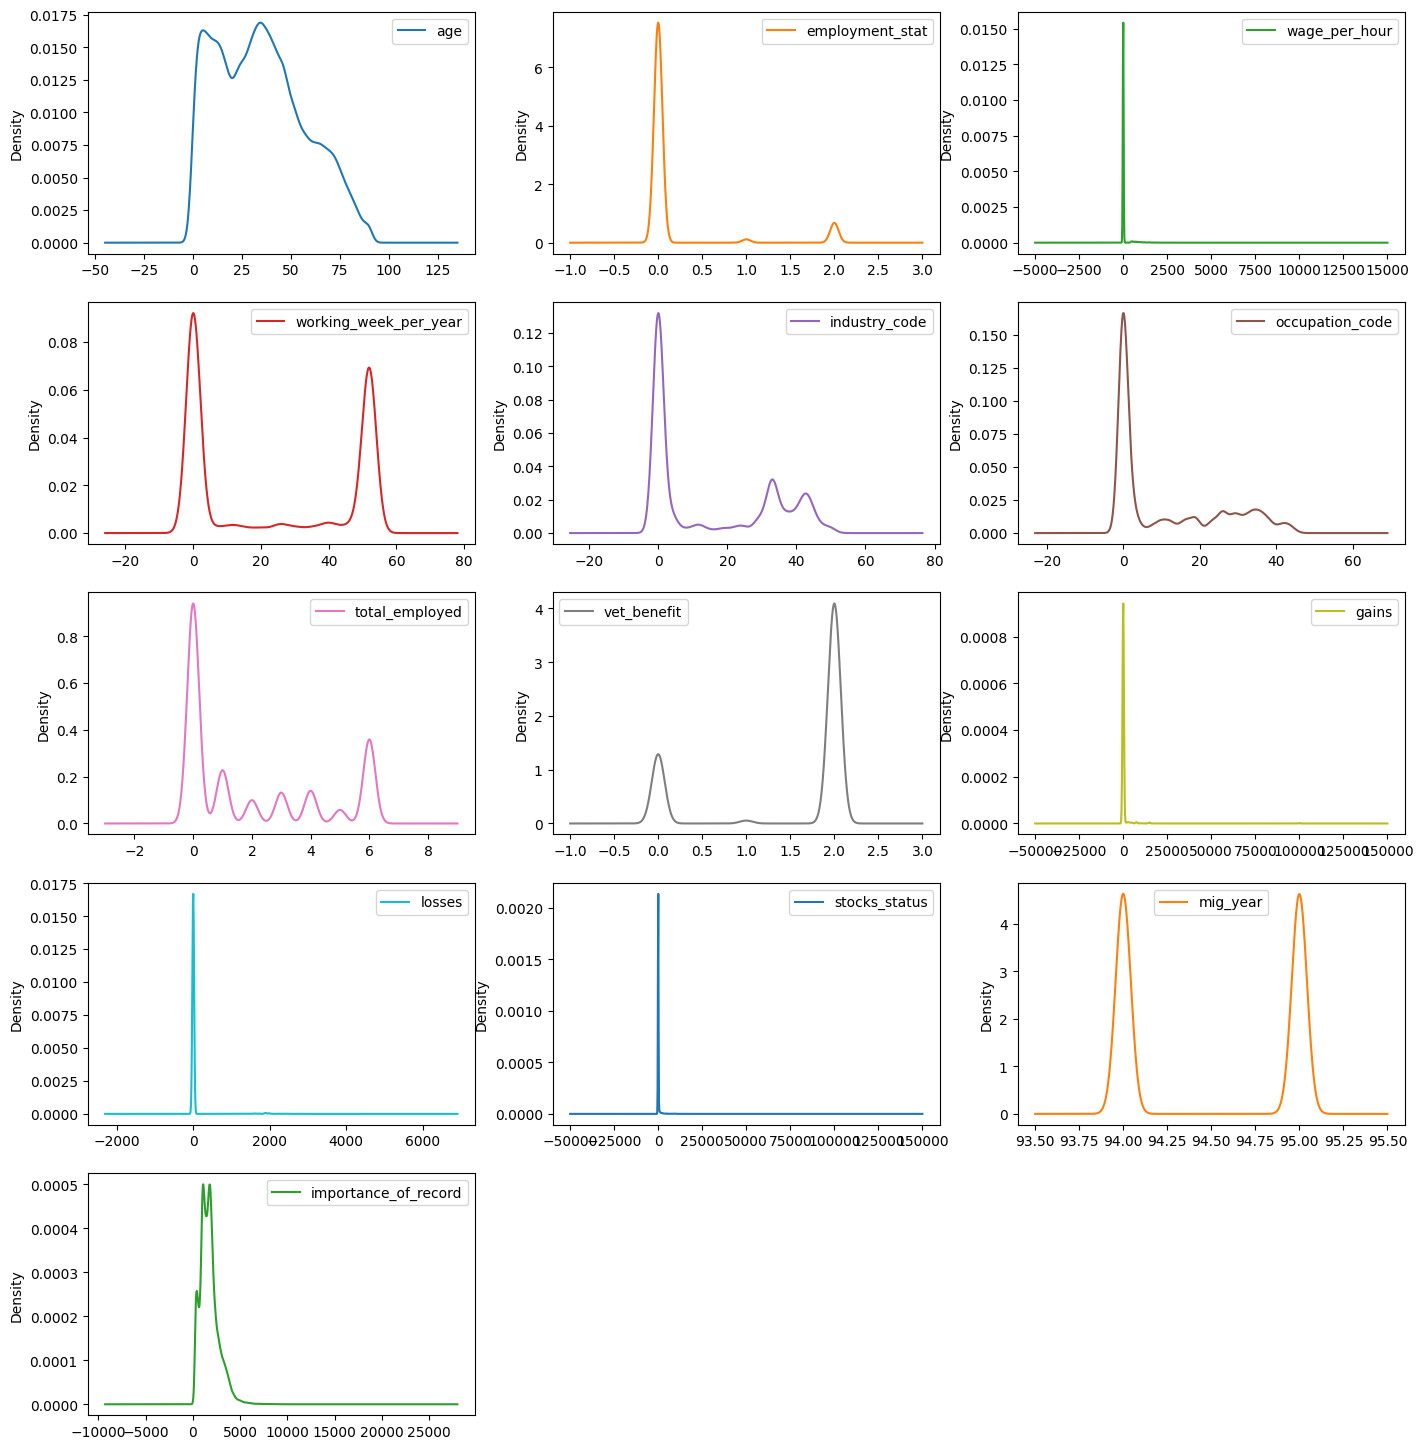

In [10]:
data.plot(kind='density',
          subplots=True,
          layout=(6,3),
          figsize = (17,22),
          sharex=False,
          sharey=False)

age                         Axes(0.125,0.712609;0.133621x0.167391)
employment_stat          Axes(0.285345,0.712609;0.133621x0.167391)
wage_per_hour             Axes(0.44569,0.712609;0.133621x0.167391)
working_week_per_year    Axes(0.606034,0.712609;0.133621x0.167391)
industry_code            Axes(0.766379,0.712609;0.133621x0.167391)
occupation_code             Axes(0.125,0.511739;0.133621x0.167391)
total_employed           Axes(0.285345,0.511739;0.133621x0.167391)
vet_benefit               Axes(0.44569,0.511739;0.133621x0.167391)
gains                    Axes(0.606034,0.511739;0.133621x0.167391)
losses                   Axes(0.766379,0.511739;0.133621x0.167391)
stocks_status                Axes(0.125,0.31087;0.133621x0.167391)
mig_year                  Axes(0.285345,0.31087;0.133621x0.167391)
importance_of_record       Axes(0.44569,0.31087;0.133621x0.167391)
dtype: object

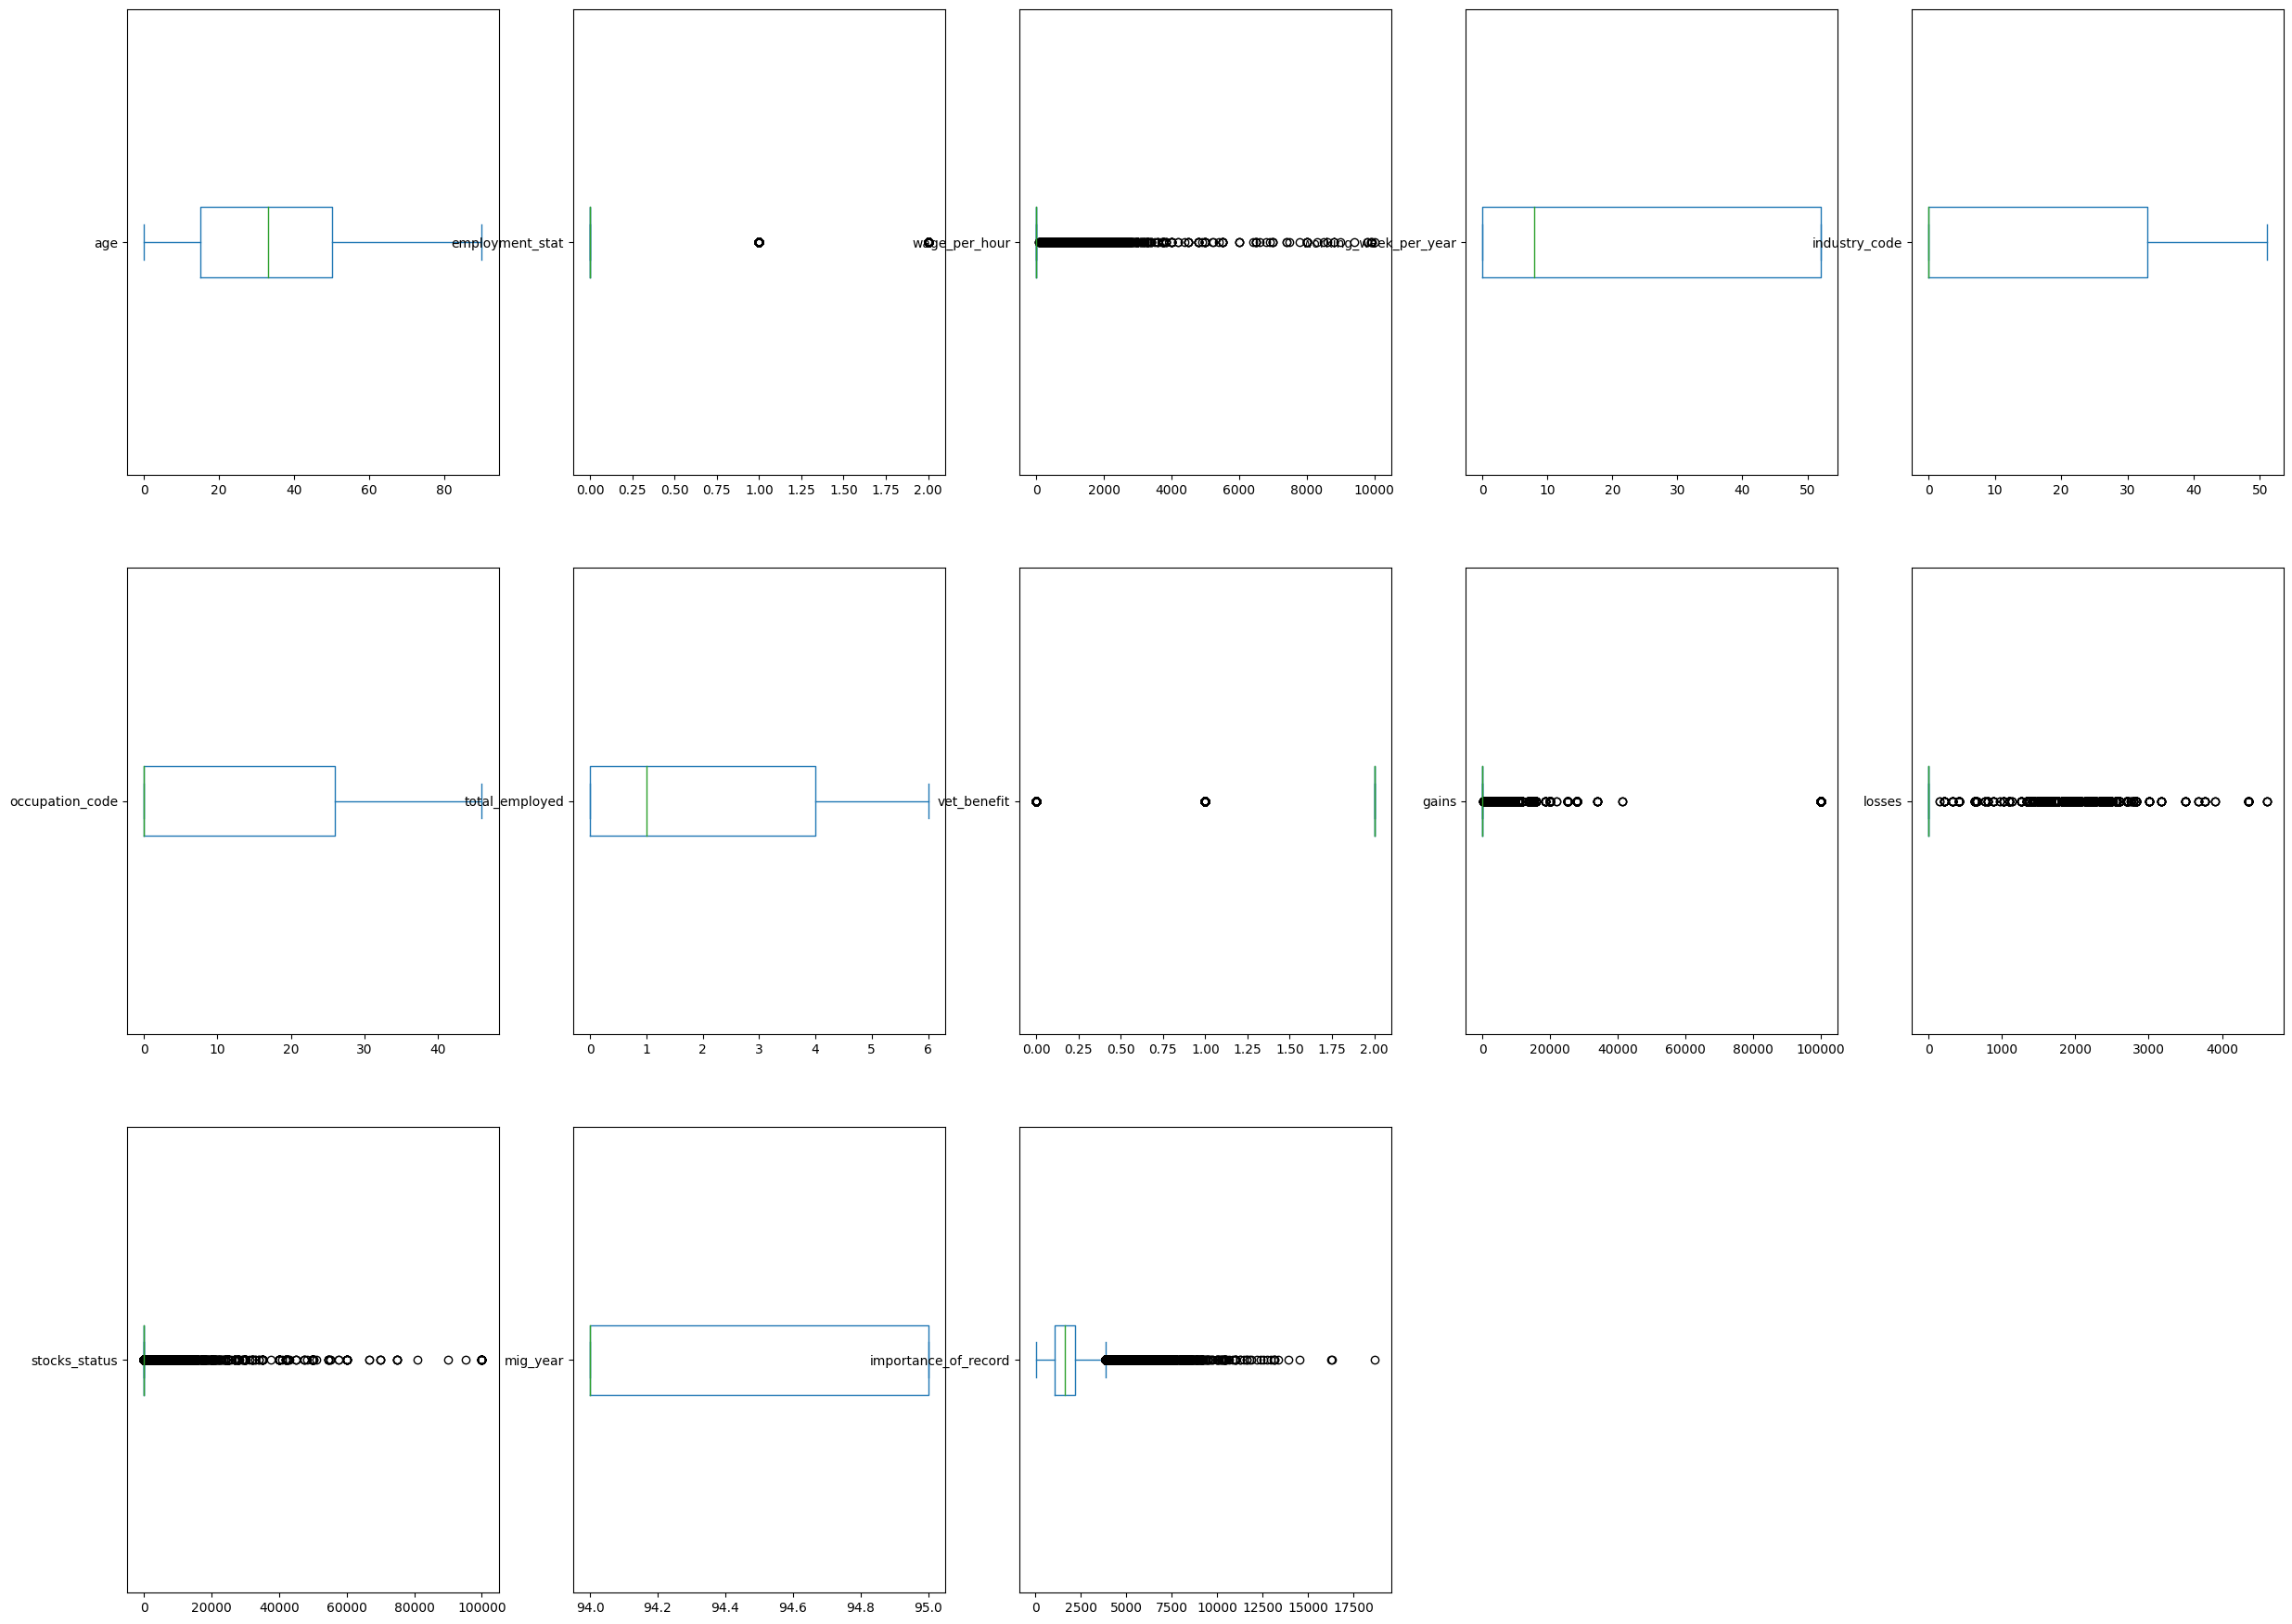

In [35]:
data.plot(kind='box',
          vert=False,
          subplots=True,
          layout=(4,5),
          figsize = (30,30),
          sharex=False,
          sharey=False)

<Axes: xlabel='income_above_limit', ylabel='count'>

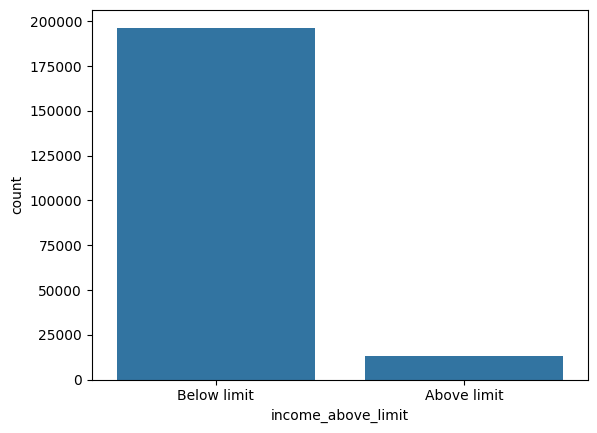

In [42]:
sns.barplot(data['income_above_limit'].value_counts())

In [ ]:
# for col in data.columns:
#    sns.relplot(
#     x="income_above_limit",  # Replace with your actual column name
#     y=data[col],  # Replace with your actual column name
#     hue="income_above_limit",  # Replace with your actual column name
#     data=data,
#     kind="scatter"  # Change to "line" if you want a line plot instead
#    )
#    plt.figure(figsize=(25,10))

In [4]:
# multi=sns.FacetGrid(data,col='income_above_limit')
# multi.map(sns.scatterplot, "age", "tax_status","gender",)
# multi.add_legend()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='ID')
sns.boxplot(ax=axes[0, 0], data=data, x='income_above_limit', y='age')
sns.boxplot(ax=axes[0, 1], data=data, x='income_above_limit', y='gender')
sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='class')
sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='education')
# sns.boxplot(ax=axes[0, 2], data=data, x='income_above_limit', y='marital_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 1], data=data, x='income_above_limit', y='employment_stat')
# sns.boxplot(ax=axes[1, 2], data=data, x='income_above_limit', y='importance_of_record')
# sns.boxplot(ax=axes[1, 1], data=data, x='income_above_limit', y='education_institute')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')
# sns.boxplot(ax=axes[1, 0], data=data, x='income_above_limit', y='tax_status')



In [80]:
data.replace({'?':np.nan},inplace=True)

Filling null values

In [82]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

In [13]:
missing_value_column=missing_value_percent[missing_value_percent>50].keys()

Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state'],
      dtype='object')

In [18]:
data.drop(missing_value_column,axis=1,inplace=True)

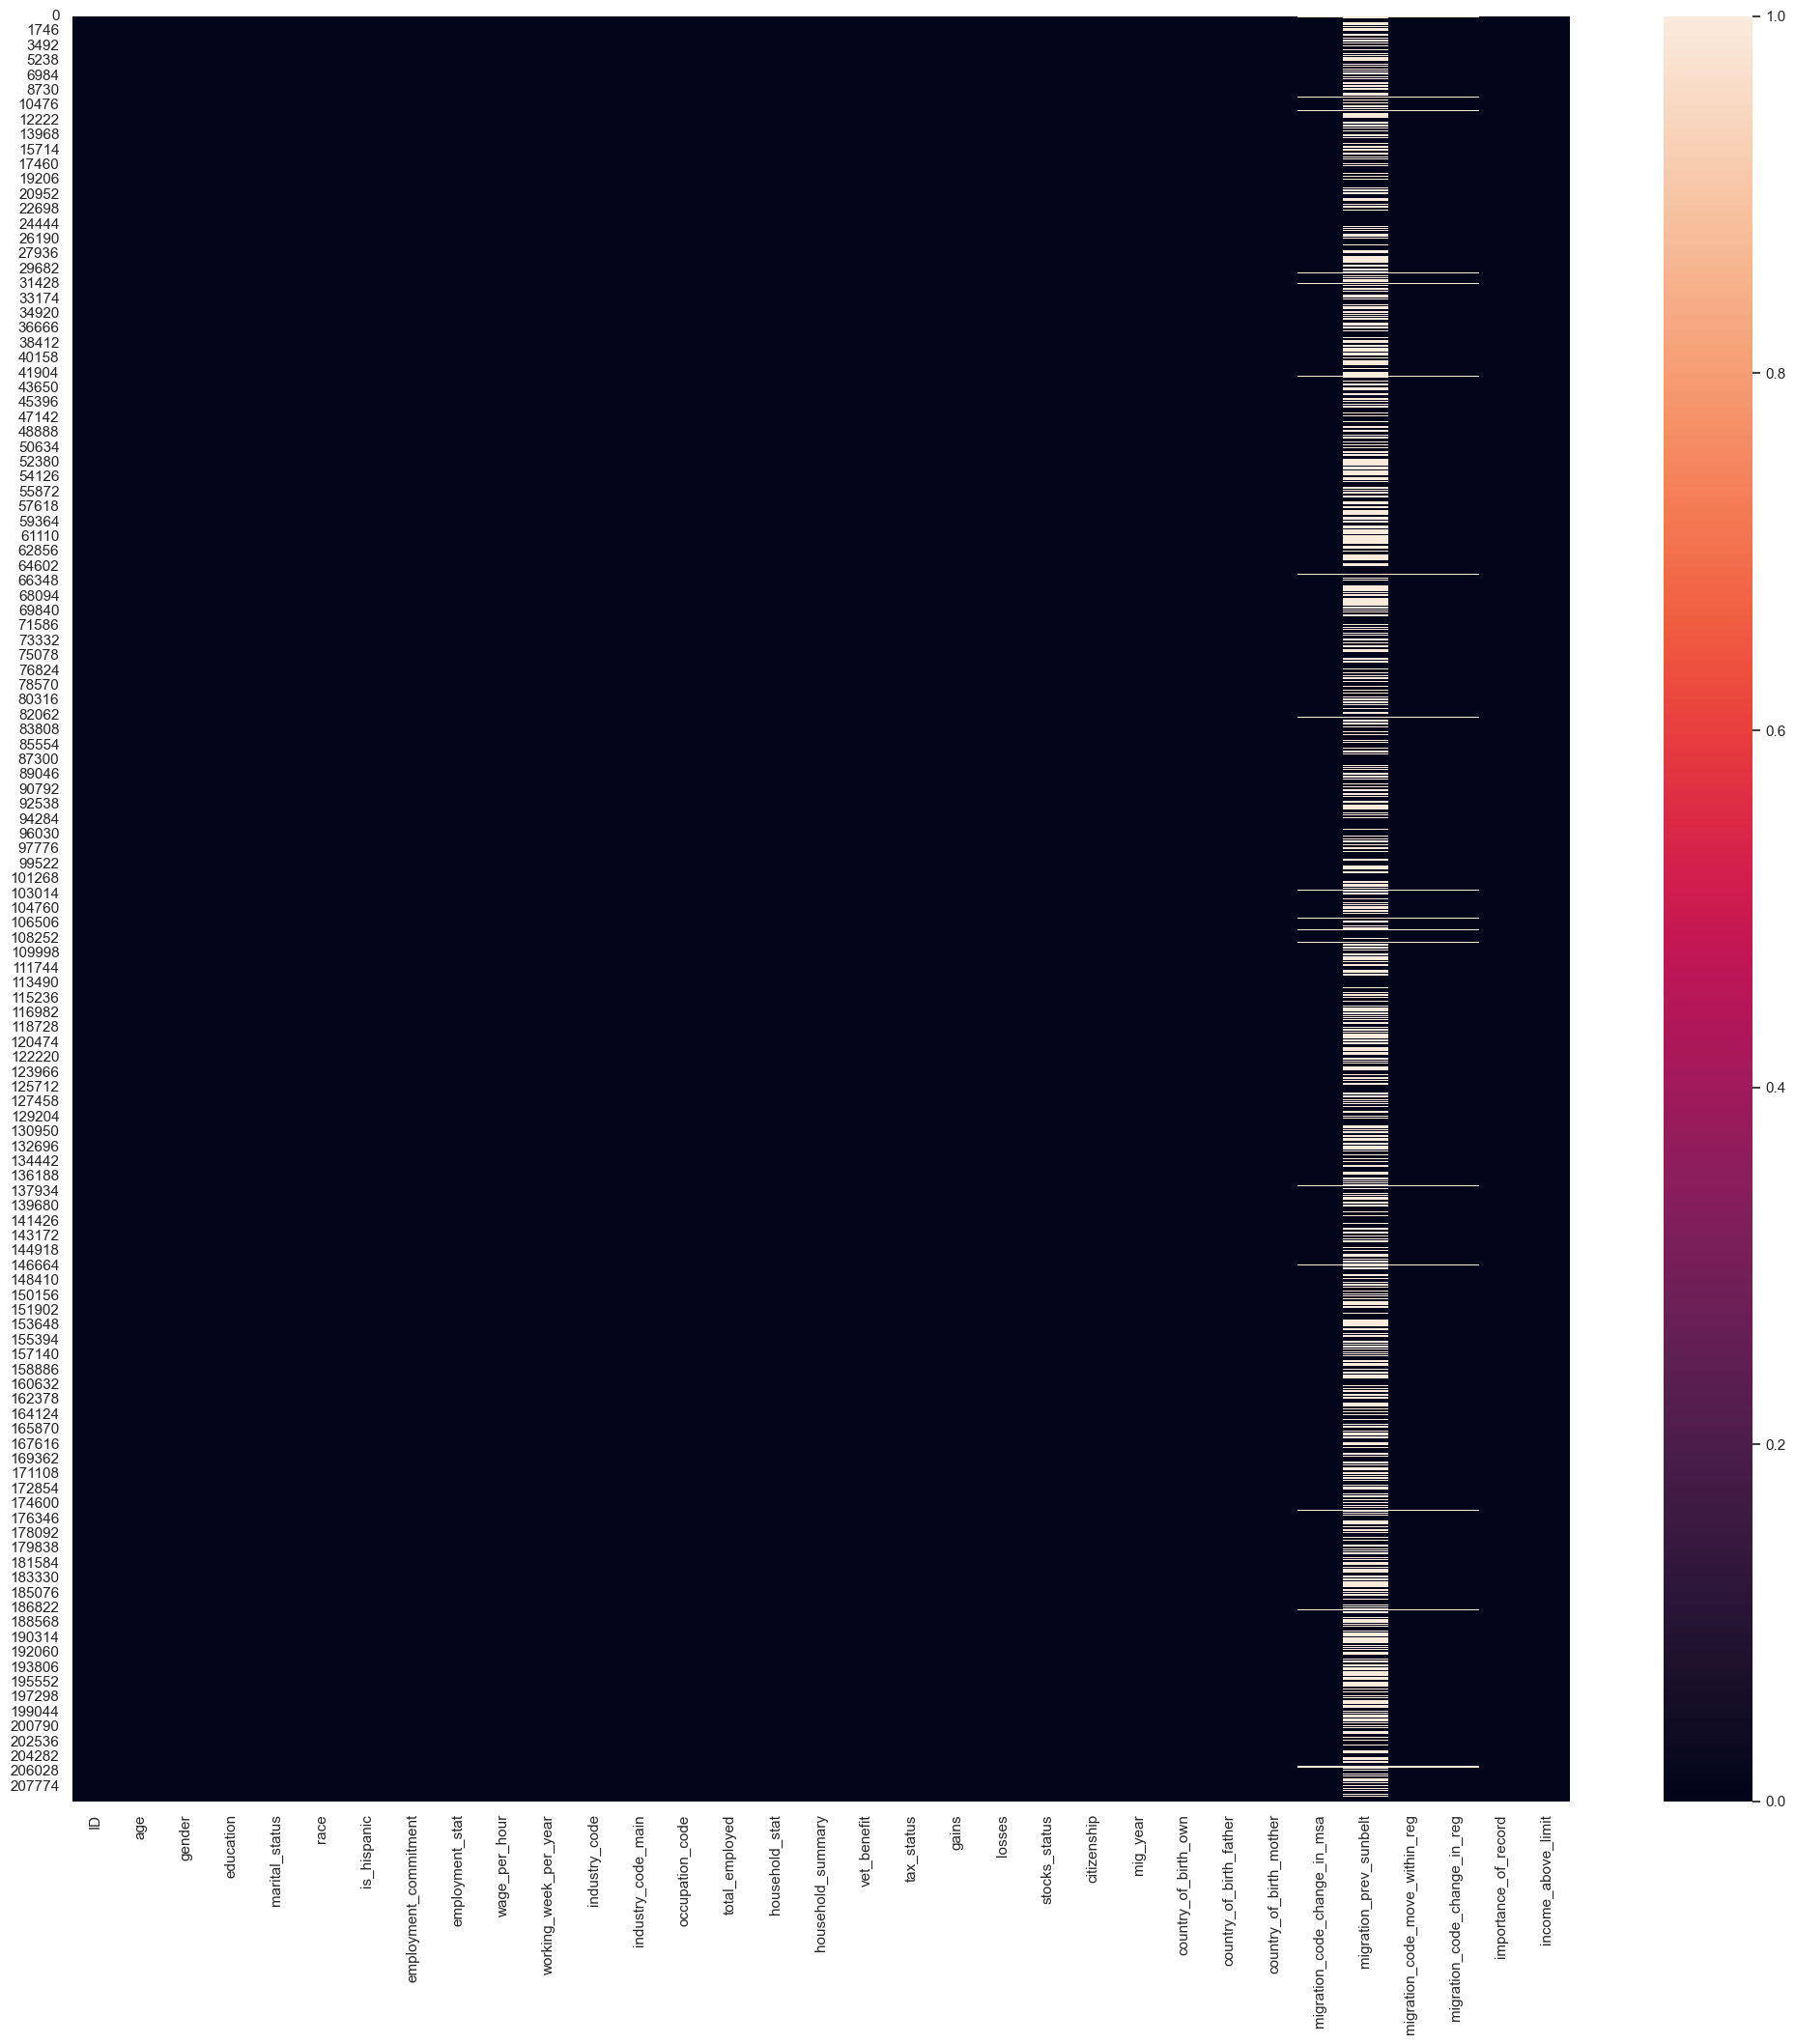

In [19]:
plt.figure(figsize=(25,24))
sns.heatmap(data.isnull())
plt.show()

In [21]:
data.isnull().sum() / data.shape[0] * 100

ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.000000
employment_commitment              0.000000
employment_stat                    0.000000
wage_per_hour                      0.000000
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
vet_benefit                        0.000000
tax_status                         0.000000
gains                              0.000000
losses                             0.000000
stocks_status                      0.000000
citizenship                     

In [23]:
data.dropna(inplace=True)

In [24]:
data.isnull().sum() / data.shape[0] * 100

ID                                0.0
age                               0.0
gender                            0.0
education                         0.0
marital_status                    0.0
race                              0.0
is_hispanic                       0.0
employment_commitment             0.0
employment_stat                   0.0
wage_per_hour                     0.0
working_week_per_year             0.0
industry_code                     0.0
industry_code_main                0.0
occupation_code                   0.0
total_employed                    0.0
household_stat                    0.0
household_summary                 0.0
vet_benefit                       0.0
tax_status                        0.0
gains                             0.0
losses                            0.0
stocks_status                     0.0
citizenship                       0.0
mig_year                          0.0
country_of_birth_own              0.0
country_of_birth_father           0.0
country_of_b

In [25]:
numerical_dataframe=data.select_dtypes(include=['int64','float64'])

age                          Axes(0.125,0.77;0.227941x0.11)
employment_stat           Axes(0.398529,0.77;0.227941x0.11)
wage_per_hour             Axes(0.672059,0.77;0.227941x0.11)
working_week_per_year       Axes(0.125,0.638;0.227941x0.11)
industry_code            Axes(0.398529,0.638;0.227941x0.11)
occupation_code          Axes(0.672059,0.638;0.227941x0.11)
total_employed              Axes(0.125,0.506;0.227941x0.11)
vet_benefit              Axes(0.398529,0.506;0.227941x0.11)
gains                    Axes(0.672059,0.506;0.227941x0.11)
losses                      Axes(0.125,0.374;0.227941x0.11)
stocks_status            Axes(0.398529,0.374;0.227941x0.11)
mig_year                 Axes(0.672059,0.374;0.227941x0.11)
importance_of_record        Axes(0.125,0.242;0.227941x0.11)
dtype: object

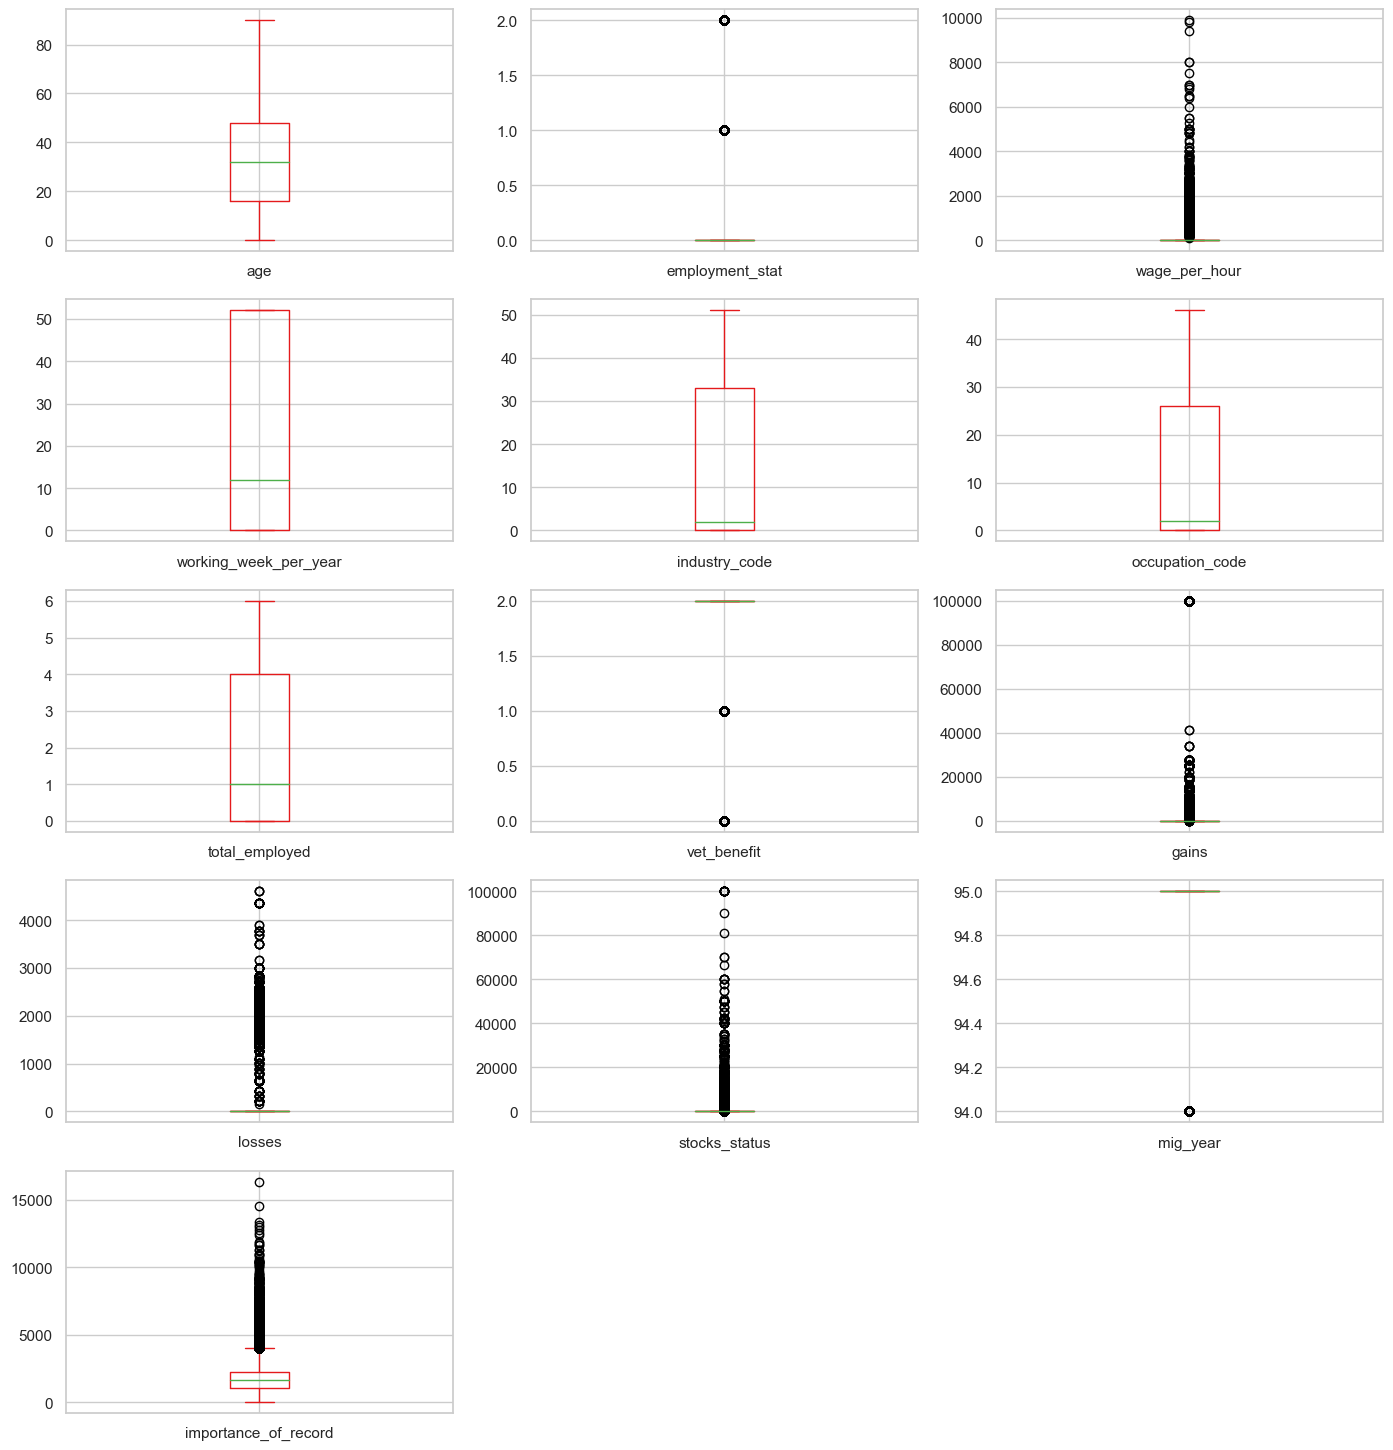

In [26]:
numerical_dataframe.plot(kind='box',
          subplots=True,
          layout=(6,3),
          figsize = (17,22),
          sharex=False,
          sharey=False)

In [33]:
#calculating outliers 
Q1=numerical_dataframe.quantile(0.75)
Q3=numerical_dataframe.quantile(0.25)
IQR=Q1-Q3
print(IQR/100)


age                       0.3200
employment_stat           0.0000
wage_per_hour             0.0000
working_week_per_year     0.5200
industry_code             0.3300
occupation_code           0.2600
total_employed            0.0400
vet_benefit               0.0000
gains                     0.0000
losses                    0.0000
stocks_status             0.0000
mig_year                  0.0000
importance_of_record     11.7839
dtype: float64


According to the above boxplots, removing outliers could lead to the loss of valuable information.

In [36]:
data.shape

(121047, 33)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121047 entries, 0 to 209498
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              121047 non-null  object 
 1   age                             121047 non-null  int64  
 2   gender                          121047 non-null  object 
 3   education                       121047 non-null  object 
 4   marital_status                  121047 non-null  object 
 5   race                            121047 non-null  object 
 6   is_hispanic                     121047 non-null  object 
 7   employment_commitment           121047 non-null  object 
 8   employment_stat                 121047 non-null  int64  
 9   wage_per_hour                   121047 non-null  int64  
 10  working_week_per_year           121047 non-null  int64  
 11  industry_code                   121047 non-null  int64  
 12  industry_code_main   

In [56]:
print(data['migration_code_change_in_msa'].value_counts())
print(data['migration_prev_sunbelt'].value_counts())
print(data['migration_code_move_within_reg'].value_counts())
print(data['migration_code_change_in_reg'].value_counts())


migration_code_change_in_msa
?                   104696
MSA to MSA           11096
NonMSA to nonMSA      2903
MSA to nonMSA          778
NonMSA to MSA          642
Not identifiable       436
Abroad to MSA          417
Abroad to nonMSA        79
Name: count, dtype: int64
migration_prev_sunbelt
 ?      104696
 No      10298
Same      6053
Name: count, dtype: int64
migration_code_move_within_reg
?                               104696
Same county                      10196
Different county same state       2946
Different state in South          1003
Different state in West            735
Different state in Midwest         560
Abroad                             498
Different state in Northeast       413
Name: count, dtype: int64
migration_code_change_in_reg
?                                 104696
Same county                        10196
Different county same state         2946
Different region                    1206
Different state same division       1018
Abroad                          

In [68]:
finalized_data=data.drop(data[['ID',"migration_prev_sunbelt",'migration_code_move_within_reg','migration_code_change_in_msa','migration_code_change_in_reg']],axis=1)


In [67]:
categorical_DataFrame = finalized_data.select_dtypes(include='object')
categorical_DataFrame.columns

Index(['gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'household_stat',
       'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'income_above_limit'],
      dtype='object')

In [ ]:
ca

In [71]:
le = LabelEncoder()
columns=['gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'household_stat',
       'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother']
# Fit and transform the categorical data
for column in columns:
   finalized_data[column] = le.fit_transform(finalized_data[column])


In [72]:
finalized_data

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,0,12,6,4,0,2,0,0,52,0,14,0,2,18,4,2,0,0,0,292,4,95,42,42,42,1779.74,Below limit
4,70,1,12,2,4,0,2,0,0,0,0,14,0,0,35,7,2,1,0,0,0,4,95,42,42,42,1580.79,Below limit
6,53,1,12,2,4,0,1,0,0,52,33,19,2,6,35,7,2,2,0,0,0,4,95,42,42,42,1401.23,Below limit
7,22,0,12,2,4,0,1,0,0,52,35,7,17,1,35,7,2,2,0,0,0,4,95,42,42,42,661.07,Below limit
8,73,0,5,2,2,0,2,0,0,1,0,14,0,3,35,7,2,1,0,0,0,4,95,42,42,42,1267.30,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209493,26,1,8,4,4,0,1,0,0,46,50,18,31,6,2,0,2,5,0,0,100,4,95,42,42,42,1643.96,Below limit
209494,16,0,5,4,4,0,2,0,0,0,0,14,0,0,8,2,2,4,0,0,0,4,95,42,42,42,2170.60,Below limit
209495,78,1,9,2,4,0,2,0,0,0,0,14,0,0,18,4,2,1,0,0,71,4,95,42,42,2,1029.57,Below limit
209496,8,0,10,4,4,0,0,0,0,0,0,14,0,0,8,2,0,4,0,0,0,4,95,42,42,42,791.61,Below limit


In [62]:
new_data_after_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   marital_status                  209499 non-null  object 
 5   race                            209499 non-null  object 
 6   is_hispanic                     209499 non-null  object 
 7   employment_commitment           209499 non-null  object 
 8   employment_stat                 209499 non-null  int64  
 9   wage_per_hour                   209499 non-null  int64  
 10  working_week_per_year           209499 non-null  int64  
 11  industry_code                   209499 non-null  int64  
 12  industry_code_ma

In [55]:
new_data_after_drop['education'].value_counts()

education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

In [69]:
for r,c in new_data_after_drop.items():
    if c.dtypes=='object':
        print(c.value_counts())

ID
ID_TZ0000      1
ID_TZ36519     1
ID_TZ3651      1
ID_TZ36510     1
ID_TZ36511     1
              ..
ID_TZ162012    1
ID_TZ162013    1
ID_TZ162014    1
ID_TZ162015    1
ID_TZ99999     1
Name: count, Length: 209499, dtype: int64
gender
Female    108784
Male      100715
Name: count, dtype: int64
education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree 

In [38]:
new_data_copy.sample(20)

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
82814,ID_TZ173705,4,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,...,Native,94,US,US,US,unchanged,unchanged,unchanged,750.83,Below limit
189295,ID_TZ81632,44,Male,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,Foreign born- Not a citizen of U S,94,?,?,?,unchanged,unchanged,unchanged,2940.82,Below limit
194330,ID_TZ8621,4,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,...,Native,94,US,US,US,unchanged,unchanged,unchanged,2518.99,Below limit
33336,ID_TZ129130,53,Male,7th and 8th grade,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,...,Native,94,US,US,US,unchanged,unchanged,unchanged,960.13,Below limit
142306,ID_TZ38915,39,Female,Some college but no degree,Married-civilian spouse present,White,Central or South American,Children or Armed Forces,0,0,...,Foreign born- U S citizen by naturalization,94,Columbia,Columbia,Columbia,MSA to MSA,Different state in South,Different region,1040.33,Below limit
182867,ID_TZ75789,71,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,Native,95,US,US,Canada,?,?,?,1003.29,Below limit
147710,ID_TZ43828,18,Female,12th grade no diploma,Never married,White,All other,Children or Armed Forces,1,0,...,Native,94,US,US,US,MSA to MSA,Same county,Same county,1283.42,Below limit
58144,ID_TZ151480,45,Female,Prof school degree (MD DDS DVM LLB JD),Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Foreign born- U S citizen by naturalization,94,Philippines,Philippines,Philippines,unchanged,unchanged,unchanged,1696.43,Above limit
172743,ID_TZ66585,51,Female,Associates degree-occup /vocational,Divorced,Black,All other,Children or Armed Forces,2,0,...,Native,94,US,US,US,MSA to MSA,Same county,Same county,1400.47,Below limit
96424,ID_TZ185967,5,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,...,Native,94,US,US,US,unchanged,unchanged,unchanged,481.85,Below limit
